# Classification from Scratch

The banknote.csv file will be used to classify whether a bill is counterfit or not based on the information in the data set.

### Index

1. Convert Columns to Standard Units
2. Split Data Set
3. Visualize data in 3d
4. Classifies point with given k
5. Test accuracy of model


### Imports

In [163]:
import numpy as np
from datascience import *
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.lines import Line2D

df0 = pd.read_csv(r'banknote.csv')
df = df0.replace(to_replace = {
            'Class' : {(0):'Counterfit',
                       (1):'Real'}})
df

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,Counterfit
1,4.54590,8.16740,-2.4586,-1.46210,Counterfit
2,3.86600,-2.63830,1.9242,0.10645,Counterfit
3,3.45660,9.52280,-4.0112,-3.59440,Counterfit
4,0.32924,-4.45520,4.5718,-0.98880,Counterfit
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,Real
1368,-1.38870,-4.87730,6.4774,0.34179,Real
1369,-3.75030,-13.45860,17.5932,-2.77710,Real
1370,-3.56370,-8.38270,12.3930,-1.28230,Real


### Convert Columns to Standard Units

In [21]:
#Converts the float or int values from a column in a table to standard units
#and returns an array.
def convert_to_standard_units(table, column):
    arr_col = table[column]
    mean_col = np.mean(arr_col)
    sd_col = np.std(arr_col)
    standardized = (arr_col - mean_col) / sd_col
    return standardized

In [22]:
convert_to_standard_units(df, 'WaveletVar')[:5]

0    1.121806
1    1.447066
2    1.207810
3    1.063742
4   -0.036772
Name: WaveletVar, dtype: float64

In [23]:
notes_su = Table().with_columns(
    'WaveletVar SU', convert_to_standard_units(df, 'WaveletVar'),
    'WaveletSkew SU', convert_to_standard_units(df, 'WaveletSkew'),
    'WaveletCurt SU', convert_to_standard_units(df, 'WaveletCurt'),
    'Entropy SU', convert_to_standard_units(df, 'Entropy'),
    'Class', df['Class'])

notes_su

WaveletVar SU,WaveletSkew SU,WaveletCurt SU,Entropy SU,Class
1.12181,1.14946,-0.97597,0.354561,Counterfit
1.44707,1.06445,-0.895036,-0.128767,Counterfit
1.20781,-0.777352,0.122218,0.618073,Counterfit
1.06374,1.29548,-1.2554,-1.14403,Counterfit
-0.0367718,-1.08704,0.73673,0.096587,Counterfit
1.3846,1.32087,-1.24365,-0.938386,Counterfit
1.11111,0.185881,-0.155217,0.836028,Counterfit
0.583612,-1.48841,1.64002,0.28068,Counterfit
0.974571,0.653913,-0.499268,0.275752,Counterfit
0.387745,1.23657,-0.85168,0.217263,Counterfit


### Split the data into training and test set

In [191]:
#Splits a dataset
#Replace 'df' with desired dataframe
#Replace .75(default) w/ percent of data one wants to train the model on
df1 = notes_su
training_proportion = .75

#Don't Touch
#Shuffles the dataframe
df2 = df1.sample(with_replacement = False)

#Don't Touch!
#Determines training number of rows.
num_rows = df2.shape[0]
train_num = (num_rows*training_proportion).astype(int)

#Don't Touch!
#Splits the set
train_df = df2.take(np.arange(train_num))
test_df = df2.take(np.arange(train_num, num_rows))

#prints number of rows for training and testing.
#Don't Touch!
print('Training: ', train_df.shape[0],  
     ';', 'Test:', test_df.shape[0])

Training:  [[1029]] ; Test: [[343]]


In [192]:
train_df

WaveletVar SU,WaveletSkew SU,WaveletCurt SU,Entropy SU,Class
-0.775386,0.257469,-0.606256,-0.565287,Real
1.61731,-1.17485,0.488544,0.454302,Counterfit
0.160531,0.0581988,-1.04497,0.510943,Real
-0.239941,-0.357995,0.814484,0.640851,Counterfit
0.0802944,1.31876,-0.391281,-0.224804,Counterfit
-0.250466,1.06798,-1.05175,-0.636089,Counterfit
-0.342537,0.92126,-0.216272,-0.125054,Counterfit
-0.177793,0.310018,-1.37848,-1.45742,Real
-0.13838,1.12513,0.0112506,-1.30411,Counterfit
0.0140565,0.245129,-1.37033,-1.35767,Real


### Scatterpots 3d variables

I will show 3 variables, even though 4 are used for simplicity.
<br>First, I will assign colors for whether a bill is counterfit or real.

In [193]:
#A function for assigning a new column where a color is assigned to each class.
color_table = Table().with_columns(
    'Class', make_array('Counterfit', 'Real'),
    'Color', make_array('red', 'blue')
)

color_df = notes_su.join('Class', color_table)
color_df

Class,WaveletVar SU,WaveletSkew SU,WaveletCurt SU,Entropy SU,Color
Counterfit,1.12181,1.14946,-0.97597,0.354561,red
Counterfit,1.44707,1.06445,-0.895036,-0.128767,red
Counterfit,1.20781,-0.777352,0.122218,0.618073,red
Counterfit,1.06374,1.29548,-1.2554,-1.14403,red
Counterfit,-0.0367718,-1.08704,0.73673,0.096587,red
Counterfit,1.3846,1.32087,-1.24365,-0.938386,red
Counterfit,1.11111,0.185881,-0.155217,0.836028,red
Counterfit,0.583612,-1.48841,1.64002,0.28068,red
Counterfit,0.974571,0.653913,-0.499268,0.275752,red
Counterfit,0.387745,1.23657,-0.85168,0.217263,red


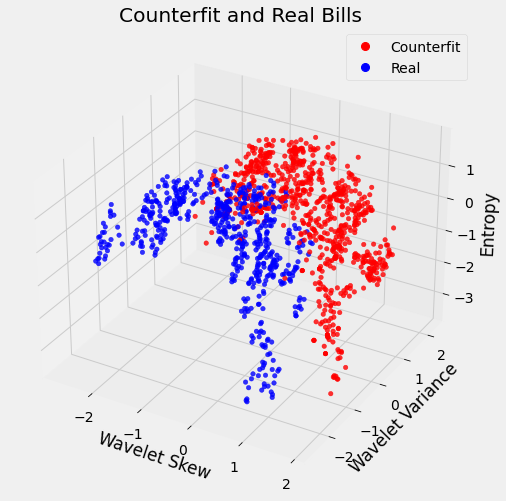

In [194]:
#replace scatter_df w/ desired df.
#replace col1, col2, and col3 with desired variables
#Table must have Color and Class columns.
scatter_df = color_df
col1 = 'WaveletSkew SU'
col2 = 'WaveletVar SU'
col3 = 'Entropy SU'

scat = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')

# Create the colors list using the function above
scat.scatter( scatter_df[col1], 
            scatter_df[col2], 
            scatter_df[col3],
            c = scatter_df['Color'], cmap = scatter_df['Class'], alpha = .8);

#Plot labels
plt.xlabel('Wavelet Skew')
plt.ylabel('Wavelet Variance')
scat.set_zlabel('Entropy')

#create legend and title
plt.title('Counterfit and Real Bills')

legend = [Line2D([0],[0], marker = 'o', color = 'red',markersize = 8, lw=0, label='Counterfit'),
         Line2D([0],[0], marker = 'o',color = 'blue',lw = 0, markersize = 8, label='Real')]

plt.legend(handles = legend);



# Functions for Classification

### Classifies Given Point

In [195]:
#Classifies a point based on data.
#k is the number of nearest neighbors
#Must have a column named "Class" to classify data against.
def classify(training_set, new_point, k):
    
    #Takes distances from given point and every point in the data set
    #Then adds a column to the data with the distance.
    def table_with_distances(training_set, new_point):
        
        #Returns the distance between two points in two arrays.
        def distance(point1, point2):
            return np.sqrt(np.sum((point1 - point2)**2))
    
        #Creates an array of distances from point.
        attributes = training_set.drop('Class')
        def distance_from_point(row):
               return distance(np.array(list(new_point)), np.array(list(row)))
        distance_arr = attributes.apply(distance_from_point)
    
        #Creates a table with distances
        distance_table = training_set.with_column('Distance', distance_arr)
    
        return distance_table
    
    #Picks k number of closest distances
    def closest(training_set, new_point, k):
        #Uses table_with_distances to select k from.
        distances_table = table_with_distances(training_set, new_point)
        sorted_table = distances_table.sort('Distance')
        top_k = sorted_table.take(np.arange(k))
        return top_k
    
    #Takes the closest points and finds a majority from the Class column
    def classify(topk):
        closest_points = closest(training_set, new_point, k)
        #makes count of unique values in Class
        unique_classes, unique_class_count = np.unique(closest_points['Class'], return_counts = True)
        #sorts based on most common item
        arr_neighbors_sort = np.argsort( - unique_class_count)
        #returns the class that appears the most
        most_common_class = unique_classes[arr_neighbors_sort].item(0)
        return most_common_class
        
    return classify(closest(training_set, new_point, k))

In [220]:
classify(train_df, test_df.drop('Class').row(10), 10)

'Counterfit'

### Test Accuracy of Model

In [197]:
#Returns the accuracy of the classifier.
#classify_model should have 3 arguments; training set, array to test, k.
def accuracy_of_model(classify_model, training_set, test_set, k):
    test_attributes = test_set.drop('Class')
    num_correct = 0
    for i in np.arange(test_set.num_rows):
        classified = classify_model(training_set, test_attributes.row(i), k)
        #Calculates the number of rows that were correct
        num_correct = num_correct + (classified == test_set.column('Class').item(i))
    return num_correct /test_set.num_rows

In [198]:
accuracy_of_model(classify, train_df, test_df, 20)

0.9883381924198251